### This Note book is dedicated to compute Graphs and Testing

In [11]:
import os
import numpy as np
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import scipy
import nibabel as nib
from nilearn import image
import matplotlib.pyplot as plt

### usefull functions for testing types

In [44]:
## Correlation between annotations

def cosine_between_annotations(annotations1, annotations2):
    """
    Compute the cosine similiarity between two annotations numpy.
    """
    if len(annotations1)>len(annotations2):
        annotations1 = annotations1[:len(annotations2)]
    else:
        annotations2 = annotations2[:len(annotations1)]
    cosine = cosine_similarity(annotations1.reshape(1,-1), annotations2.reshape(1,-1))
    return cosine ,len(annotations1),len(annotations2)

## Plot annotations according to moving average
def plot_annotation(annotations, window_size=10):
    """
    Plot the annotations with a moving average.

    Parameters:
        annotations (numpy array): The annotation values to be smoothed.
        window_size (int): The size of the moving average window.

    Returns:
        numpy array: The smoothed annotations.
    """
    if len(annotations.shape) > 1:  # Ensure it's 1D
        annotations = annotations.flatten()

    # Apply moving average
    window = np.ones(window_size) / window_size
    smoothed_annotations = np.convolve(annotations, window, mode='same')

    # Plot
    plt.figure(figsize=(14, 4))
    plt.scatter(range(len(annotations)), annotations, label="Original Binary Data", color="black", alpha=0.6, s=10)
    plt.plot(smoothed_annotations, label=f"Smoothed (window={window_size})", color="red",alpha=0.6, linewidth=2)
    
    plt.xlabel("Time")
    plt.ylabel("Annotation Value")
    plt.title("Binary Annotations with Moving Average Smoothing")
    plt.legend()
    plt.ylim(-0.1, 1.1)  # Keep within binary range
    plt.show()

    return smoothed_annotations

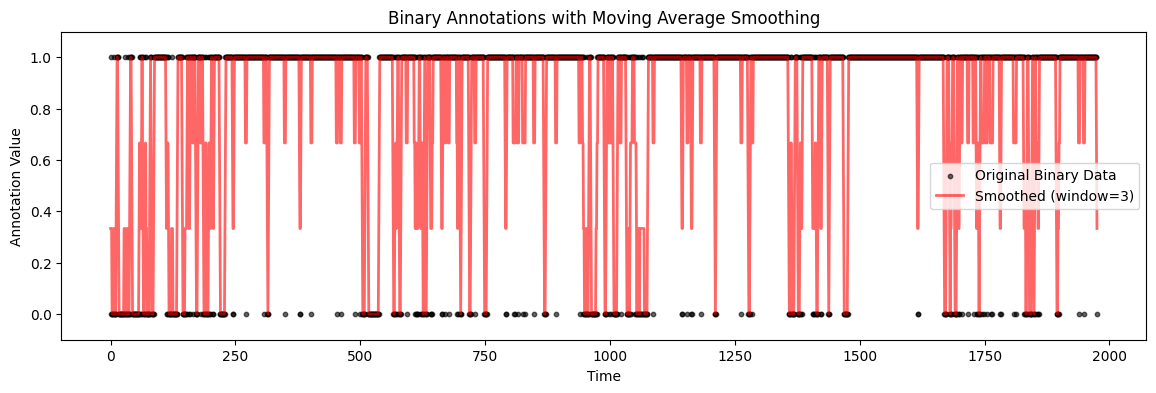

array([0.33333333, 0.33333333, 0.33333333, ..., 1.        , 0.66666667,
       0.33333333])

In [45]:
annot = np.load(r'C:\uni\Msc Brain\Lab work\STS_sherlock\projects data\annotations\llava_social_speak_full.npy')
plot_annotation(annot, window_size=3)

(array([[0.81625194]]), 1975, 1975)
(array([[0.86286742]]), 1976, 1976)
(array([[0.85817621]]), 1053, 1053)
